In [7]:
import numpy as np
from scipy import signal, fftpack
import matplotlib.pyplot as plt
from mne.time_frequency.tfr import morlet
from mne.viz import plot_filter, plot_ideal_filter
import mne

In [9]:
sfreq = 1000
f_p = 40 # f_p는 pass-band, f_s는 stop-band
flim = (1., sfreq/2.)  # limits for plotting

In [10]:
nyq = sfreq / 2. # the Nyquist frequency is half our sample rate
freq = [0, f_p,f_p, nyq]
gain = [1, 1, 0, 0]

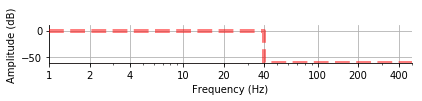

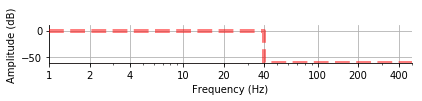

In [12]:
third_height = np.array(plt.rcParams['figure.figsize']) * [1,1./3.]
ax = plt.subplots(1, figsize = third_height)[1]
plot_ideal_filter(freq, gain, ax, title='Ideal %s Hz lowpass' %f_p, flim=flim)

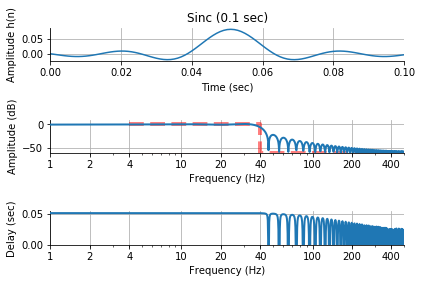

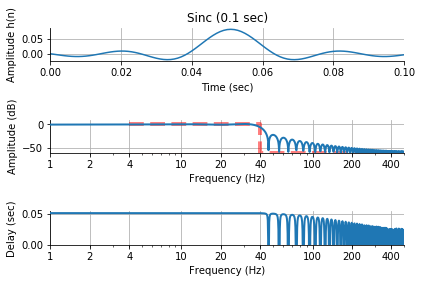

In [13]:
# brick-wall filter of length 0.1 sec
n = int(round(0.1 * sfreq)) + 1
t = np.arange(-n // 2, n // 2) / sfreq # center our sinc
h = np.sinc(2 * f_p * t) / (4 * np.pi)
plot_filter(h, sfreq, freq, gain, 'Sinc (0.1 sec)', flim = flim)

In [14]:
# Applying FIR filters
# Gaussian-windowed sinusoid plus noise(random+line)
dur = 10
center = 2
morlet_freq = f_p
tlim = [center - 0.2, center + 0.2]
tticks = [tlim[0], center, tlim[1]]
flim = [20, 70]

In [18]:
x = np.zeros(int(sfreq*dur)+1)
blip = morlet(sfreq, [morlet_freq], n_cycles=7)[0].imag / 20 # morlet은 Morlet wavelets를 계산

In [19]:
n_onset = int(center * sfreq) - len(blip) // 2
x[n_onset:n_onset + len(blip)] += blip
x_orig = x.copy()

In [20]:
rng = np.random.RandomState(0)
x += rng.randn(len(x)) / 1000.
x += np.sin(2. * np.pi * 60. * np.arange(len(x)) / sfreq) / 2000.

In [22]:
transition_band = 0.25 * f_p
f_s = f_p + transition_band
filter_dur = 6.6 / transition_band / 2. #sec
n = int(sfreq * filter_dur)

Setting up low-pass filter at 40 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 331 samples (0.331 sec) selected


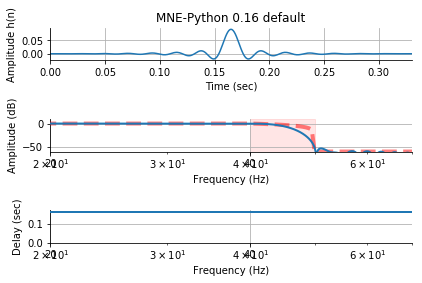

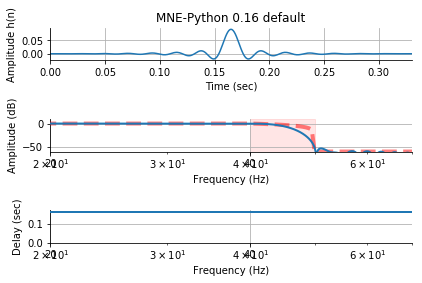

In [23]:
freq = [0., f_p, f_s, sfreq / 2.]
gain = [1., 1., 0., 0.]
# This would be equivalent:
h = mne.filter.create_filter(x, sfreq, l_freq=None, h_freq=f_p,fir_design='firwin')
x_v16 = np.convolve(h, x)[len(h) // 2:]
plot_filter(h, sfreq, freq, gain, 'MNE-Python 0.16 default', flim = flim)